In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
# default_exp models

# Models

> SIR etc

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
# export
import attr
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set(style="ticks")

@attr.s
class SIR(object):
    N = attr.ib(converter=int)
    I = attr.ib(converter=float)
    beta = attr.ib(converter=float)
    gamma = attr.ib(converter=float)
    days = attr.ib(converter=int, default=200)
    
    S = attr.ib(init=False, converter=float)
    
    R = attr.ib(init=False, converter=float, default=0.0)
    
    
    def __attrs_post_init__(self):
        self.S = self.N - self.I - self.R
    
    
    @staticmethod
    def ode(t, y, beta, gamma, N):
        S, I, R = y
        
        new_cases = beta*S*I/N
        removed_cases = gamma*I
        S = -new_cases
        I = new_cases - removed_cases
        R = removed_cases

        y = (S,I,R)

        return y
    
    def solve_days(self):
        y = (self.S, self.I, self.R)
        return solve_ivp(SIR.ode, [0,self.days], y,t_eval=np.arange(0,self.days), args=(self.beta, self.gamma, self.N))

        
    def plot(self):
        sol = self.solve_days()
        df_sol = pd.DataFrame(sol.y.T, index=sol.t, columns=["S","I","R"])
        sns.lineplot(data=df_sol)


## Class methods

In [ ]:
show_doc(SIR.ode)

<h4 id="SIR.ode" class="doc_header"><code>SIR.ode</code><a href="__main__.py#L26" class="source_link" style="float:right">[source]</a></h4>

> <code>SIR.ode</code>(**`t`**, **`y`**, **`beta`**, **`gamma`**, **`N`**)



## Instance methods

In [ ]:
show_doc(SIR.solve_days)
show_doc(SIR.plot)

<h4 id="SIR.solve_days" class="doc_header"><code>SIR.solve_days</code><a href="__main__.py#L40" class="source_link" style="float:right">[source]</a></h4>

> <code>SIR.solve_days</code>()



<h4 id="SIR.plot" class="doc_header"><code>SIR.plot</code><a href="__main__.py#L45" class="source_link" style="float:right">[source]</a></h4>

> <code>SIR.plot</code>()



In [ ]:
m = SIR(5000,6,0.3,0.1)
m

SIR(N=5000, I=6.0, beta=0.3, gamma=0.1, days=200, S=4994.0, R=0.0)

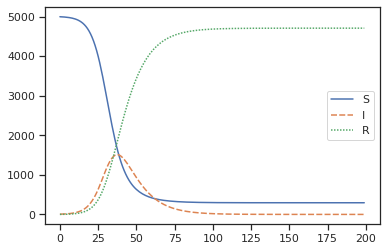

In [ ]:
df_sol = m.plot()

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_models.ipynb.
Converted index.ipynb.
